# NBA University Study

In [1]:
# Dependencies and Setup
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import hvplot.pandas

In [2]:
# Pull NBA draft CSV
draft_path = Path("Resources/cleaned_draft_data.csv")
draft_data = pd.read_csv(draft_path)
draft_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain


In [3]:
# Pull NBA salary CSV
salaries_path = Path("Resources/cleaned_salary_data.csv")
salaries = pd.read_csv(salaries_path)
salaries.head()

,_id,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,2844000,6.304225e+06
1,abdulka01,8560000,2.406022e+07
2,abdulma02,19849500,4.177226e+07
3,abdulta01,37982800,6.558494e+07
4,abdursh01,95866000,1.630366e+08


In [4]:
# Merge data
full_data = pd.merge(draft_data, salaries, on="_id")
full_data.head()

,_id,Name,Month,Day,Year,Position,College,Draft Year,Draft Round,Draft Pick,Career Games Played,Career Points Per Game,Total Career Points,Birth City,Birth State/Country,Total Earnings,Inflation-Adjusted Earnings
0,abdelal01,Alaa Abdelnaby,June,24,1968,Power Forward,Duke University,1990,1st round,25th overall,256,5.7,1459,Cairo,Egypt,2844000,6.304225e+06
1,abdulma02,Mahmoud Abdul-Rauf,March,9,1969,Point Guard,Louisiana State University,1990,1st round,3rd overall,586,14.6,8555,Gulfport,Mississippi,19849500,4.177226e+07
2,abdulta01,Tariq Abdul-Wahad,November,3,1974,Shooting Guard,"University of Michigan, San Jose State University",1997,1st round,11th overall,236,7.8,1840,Maisons Alfort,France,37982800,6.558494e+07
3,abdursh01,Shareef Abdur-Rahim,December,11,1976,Center and Small Forward and Power Forward,University of California,1996,1st round,3rd overall,830,18.1,15023,Marietta,Georgia,95866000,1.630366e+08
4,abrinal01,Alex Abrines,August,1,1993,Shooting Guard,No college,2013,2nd round,32nd overall,174,5.3,922,Palma de Mallorca,Spain,11719764,1.504430e+07


In [5]:
# Print total number of rows
full_data.count()

_id                            1535
Name                           1535
Month                          1535
Day                            1535
Year                           1535
Position                       1535
College                        1535
Draft Year                     1535
Draft Round                    1535
Draft Pick                     1535
Career Games Played            1535
Career Points Per Game         1535
Total Career Points            1535
Birth City                     1535
Birth State/Country            1532
Total Earnings                 1535
Inflation-Adjusted Earnings    1535
dtype: int64

## What university produces the most NBA players?

In [6]:
# Group data by colleges and sort by highest number of rows
uni_data = full_data.groupby("College")
most_players = uni_data.size().sort_values(ascending=False)
display(most_players.head())

College
No college                               210
University of Kentucky                    44
Duke University                           42
University of California, Los Angeles     40
University of North Carolina              38
dtype: int64

In [7]:
# Find college with the highest number of players produced
i = 0
while most_players.index[i] == "No college":
    i += 1
print(f"The university that produces the highest number of NBA players is: {most_players.index[i]} with a total of {most_players.loc[most_players.index[i]]} players.")

The university that produces the highest number of NBA players is: University of Kentucky with a total of 44 players.


In [8]:
most_players_df = pd.DataFrame(most_players)
most_players_df_index = most_players_df.reset_index()
most_players_df_index

,College,0
0,No college,210
1,University of Kentucky,44
2,Duke University,42
3,"University of California, Los Angeles",40
4,University of North Carolina,38
...,...,...
308,Rider University,1
309,"Rutgers University, Duke University",1
310,"Rutgers University, Manhattan College",1
311,Saint Mary's College of California,1


## Which university produces the highest average career earnings?

In [9]:
# Group data by colleges and sort by highest average earnings per player
highest_earnings = uni_data["Total Earnings"].mean().sort_values(ascending=False)
display(highest_earnings.head())

College
Santa Clara University              146936620.0
United States Naval Academy         119000123.0
University of Central Arkansas      109192430.0
University of Hartford               97390894.0
Trinity Valley Community College     91572963.0
Name: Total Earnings, dtype: float64

In [10]:
# Find the college with the highest average earnings per player
i = 0
while highest_earnings.index[i] == "No college":
    i += 1
highest_value = "${:,.2f}".format(highest_earnings.loc[highest_earnings.index[i]])
print(f"The university that produces the highest average player earnings is: {highest_earnings.index[i]} with a total of {highest_value}")

The university that produces the highest average player earnings is: Santa Clara University with a total of $146,936,620.00


## Which university produces the most #1 draft picks?

In [11]:
# Group data by colleges and sort by highest #1 draft picks
first_picks = full_data.loc[full_data["Draft Pick"] == "1st overall"][["College", "Draft Pick"]]
first_picks_uni_data = first_picks.groupby("College")
most_picks = first_picks_uni_data.count().sort_values(by="Draft Pick", ascending=False).squeeze()
display(most_picks.head())

College
No college                    5
University of Kentucky        3
Duke University               2
Louisiana State University    2
University of Kansas          2
Name: Draft Pick, dtype: int64

In [12]:
# Find the college with the highest number of #1 draft picks
i = 0
while most_picks.index[i] == "No college":
    i += 1
print(f"The university that produces the highest number of #1 draft picks is: {most_picks.index[i]} with a total of {most_picks.loc[most_picks.index[i]]} players.")

The university that produces the highest number of #1 draft picks is: University of Kentucky with a total of 3 players.


In [13]:
highest_earnings_df = pd.DataFrame(highest_earnings)
highest_earnings_df_index = highest_earnings_df.reset_index()
highest_earnings_df_index

,College,Total Earnings
0,Santa Clara University,146936620.0
1,United States Naval Academy,119000123.0
2,University of Central Arkansas,109192430.0
3,University of Hartford,97390894.0
4,Trinity Valley Community College,91572963.0
...,...,...
308,George Mason University,75000.0
309,"Stanford University, University of California,...",75000.0
310,"California State University, Fresno, San Diego...",52033.0
311,"United States Naval Academy, University of Pit...",43000.0


In [14]:
earnings_comp = pd.merge(most_players_df_index, highest_earnings_df_index, on="College")
earnings_comp

,College,0,Total Earnings
0,No college,210,3.697688e+07
1,University of Kentucky,44,2.661594e+07
2,Duke University,42,3.433325e+07
3,"University of California, Los Angeles",40,2.696630e+07
4,University of North Carolina,38,3.460828e+07
...,...,...,...
308,Rider University,1,3.469075e+07
309,"Rutgers University, Duke University",1,1.801723e+07
310,"Rutgers University, Manhattan College",1,3.852770e+05
311,Saint Mary's College of California,1,2.532814e+07


In [15]:
earnings_comp.columns = ["College", "Number of Players", "Average Earnings Per Player"]
earnings_comp["Average Earnings Per Player"] = earnings_comp["Average Earnings Per Player"].astype(int)

In [16]:
x = earnings_comp["Average Earnings Per Player"]
y = earnings_comp["Number of Players"]

earnings_comp_chart = earnings_comp.hvplot.points(
    "Average Earnings Per Player",
    "Number of Players",
    alpha = 0.5,
    scale = 0.75,
    hover_cols=["College"],
frame_width = 650,
frame_height = 500)

earnings_comp_chart

:Points   [Average Earnings Per Player,Number of Players]   (College)

In [30]:
#Grouping by univseristy and calculating the mean and median earnings

In [31]:
grouped = full_data.groupby('College')
mean_values = grouped['Total Earnings'].mean()
median_values = grouped['Total Earnings'].median()

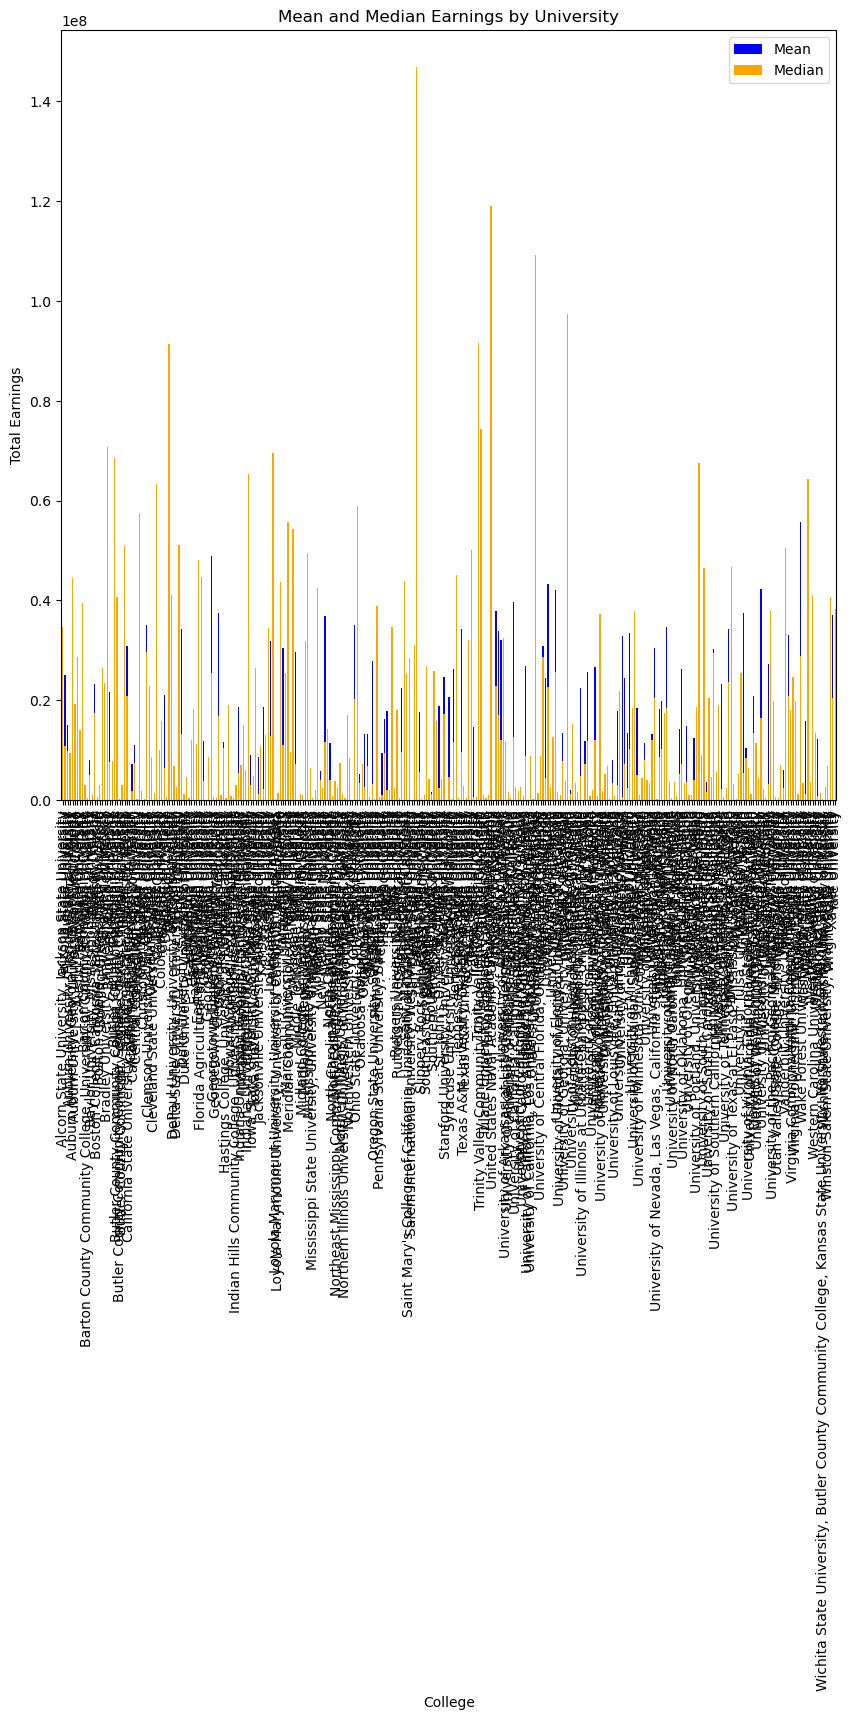

In [39]:
# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

mean_values.plot(kind='bar', color='blue', label='Mean')
median_values.plot(kind='bar', color='orange', label='Median')

plt.xlabel('College')
plt.ylabel('Total Earnings')
plt.title('Mean and Median Earnings by University')
plt.legend()
plt.show()